
#🏛️ Welcome to the NLP Challenge! ⚖️🚀
Hey there, ML wizard! 🧙‍♂️✨
<br><br>
🔍 Your Task: Predict the outcome of legal cases—meaning how these cases will be referenced or used in future legal decisions—based only on the case title and case text. 📜⚖️
<br><br>
What We're Looking For 👀
This is not a leaderboard challenge! We're not just hunting for the highest accuracy score. Instead, we care about:
- ✅ Your approach – How you analyze and structure the problem.
- ✅ Your creativity – Can you think beyond the obvious solutions?
- ✅ Your rigor – Thoughtful data preprocessing and model selection.
- ✅ Your reasoning – Why did you pick a certain method? Explain it!

If you use logistic regression, cool. If you dive into BERT embeddings, awesome. Just make sure you can explain your choices! 💡

You have been provided with the `data` folder which contains:

- `training.csv`: This contains labeled examples with case titles, case text, and their respective outcomes.
- `test.csv`: This *contains* case titles and case text without labels. Your model must predict the case_outcome for each example.

📂 Next Steps: Make a copy of this notebook, explore the data, build your model, and work your magic! 🧠✨ Once you're done, submit the link to your completed notebook along with your `name_phonenumber_predictions.csv file`. 🚀

    _    _     _       _____ _   _ _____   ____  _____ ____ _____ 
   / \  | |   | |     |_   _| | | | ____| | __ )| ____/ ___|_   _|
  / _ \ | |   | |       | | | |_| |  _|   |  _ \|  _| \___ \ | |  
 / ___ \| |___| |___    | | |  _  | |___  | |_) | |___ ___) || |  
/_/   \_\_____|_____|   |_| |_| |_|_____| |____/|_____|____/ |_|  
                                                                  



##1. Data Loading and Exploration
- Read both training.csv and test.csv using Pandas.
- Check for missing values, duplicates, and dataset statistics.
- Perform basic text analysis (word count, distribution of labels, etc.).
- Perform advanced analysis and report your findings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Namrata.Paikekar\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Namrata.Paikekar\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [25]:
train_df = pd.read_csv("data\\train.csv")
test_df = pd.read_csv("data\\test.csv")

In [26]:
train_df.head()

,case_title,case_text,case_outcome
0,Re Lamb; Ex parte Registrar in Bankruptcy (198...,The following exchange took place on the first...,cited
1,Ogle v Strickland (1987) 13 FCR 306,"Fourth, the respondent's submissions concernin...",cited
2,Walton v Gardiner [1993] HCA 77 ; (1993) 177 C...,"First, in my opinion, to relitigate the events...",applied
3,Stack &amp; Anor v Elster Metering Pty Ltd &am...,Stack and GST made a further application to th...,cited
4,Grant v Downs [1976] HCA 63 ; (1976) 135 CLR 674,was no great disagreement between counsel as t...,applied


In [27]:
test_df.head(1)

,case_title,case_text
0,Air Great Lakes Pty Ltd v K S Easter (Holdings...,In Air Great Lakes Pty Ltd v K S Easter (Holdi...


In [28]:
train_df['case_outcome'].value_counts()

case_outcome
cited            9775
referred to      3507
applied          1959
followed         1805
considered       1370
discussed         819
distinguished     486
related            90
affirmed           90
approved           87
Name: count, dtype: int64

In [29]:
# viewing sample data
train_df['case_text'][11]

"Minister relied on remarks of McHugh J in Re Minister for Immigration and Multicultural Affairs Ex parte Durairajasingham [2000] HCA 1 ; (2000) 74 ALJR 405 (and in particular I apprehend at 412-413 [35]-[36] and 416-418 [60]-[70]) that in effect the Tribunal in stating its reasons for decision was entitled to make findings of fact and was not required to go through line by line each item of evidence, or each relevant matter and deal with it in turn, accepting or dismissing it. So much may be accepted. The Minister also argued that the decision required under s 65 of the Migration Act 1958 (Cth) ('the Act') was whether or not the Tribunal, standing in the shoes of the Minister as the decision-maker, was satisfied of the matters set out in the Regulations for the purposes of granting the visa for which the appellant applied. She contended that findings along the way were not ones which went to jurisdiction. I am of opinion that it was not open to the Tribunal, on the basis only of the f

In [30]:
train_df.shape

(19988, 3)

In [31]:
test_df.shape

(4997, 2)

In [32]:
(train_df.isnull().sum()/train_df.shape[0])*100

case_title      0.000000
case_text       0.725435
case_outcome    0.000000
dtype: float64

In [33]:
# we can drop the missing values records as its is less than 1% 
train_df.dropna(inplace=True)

In [34]:
(test_df.isnull().sum()/test_df.shape[0])*100

case_title    0.000000
case_text     0.620372
dtype: float64

In [35]:
# similarlly for test data also we can drop the missing values
test_df.dropna(inplace=True)

In [36]:
train_df.dtypes

case_title      object
case_text       object
case_outcome    object
dtype: object

In [37]:
train_df.describe(include='object')

,case_title,case_text,case_outcome
count,19843,19843,19843
unique,15254,15004,10
top,Minister for Immigration and Ethnic Affairs v ...,"noted above, Comandate Marine's proceedings in...",cited
freq,55,32,9684


In [38]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_df['case_outcome_encoded'] = encoder.fit_transform(train_df['case_outcome'])

In [39]:
distribution_of_data = train_df['case_outcome_encoded'].value_counts()

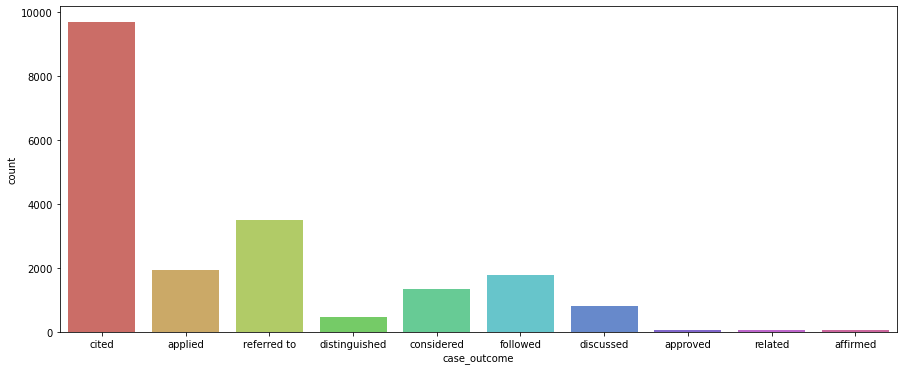

In [40]:
plt.figure(figsize=(15,6))
sns.countplot(train_df['case_outcome'], data=train_df, palette='hls')
plt.show()

In [41]:
# function for basic preprocessing 
def clean_text(text):
    text = text.lower()
    return text.strip()

# apply function to textual columns
train_df['case_text'] = train_df['case_text'].apply(lambda x:clean_text(x))
train_df['case_title'] = train_df['case_title'].apply(lambda x:clean_text(x))

In [42]:
import string

def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

train_df['case_text'] = train_df['case_text'].apply(lambda x:remove_punctuation(x))
train_df['case_title'] = train_df['case_title'].apply(lambda x:remove_punctuation(x))

In [43]:
# !pip install wordcloud

In [44]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    output = " ".join(word for word in text.split() if word.lower() not in stopwords)
    return output

# Apply tokenization to the 'case_text' column
train_df['case_text'] = train_df['case_text'].apply(lambda x:remove_stopwords(x))
train_df['case_title'] = train_df['case_title'].apply(lambda x:remove_stopwords(x))

In [46]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize the text
def lemmatizer_func(text):
    lemm_text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return lemm_text

# Apply lemmatization to the 'case_text' column
train_df['case_text'] = train_df['case_text'].apply(lemmatizer_func)
train_df['case_title'] = train_df['case_title'].apply(lemmatizer_func)

In [48]:
train_df.head(5)

,case_title,case_text,case_outcome,case_outcome_encoded
0,lamb ex parte registrar bankruptcy 1984 1 fcr 391,following exchange took place first three day ...,cited,3
1,ogle v strickland 1987 13 fcr 306,fourth respondent submission concerning issue ...,cited,3
2,walton v gardiner 1993 hca 77 1993 177 clr 378,first opinion relitigate event 27 march 2006 a...,applied,1
3,stack amp anor v elster metering pty ltd amp o...,stack gst made application high court special ...,cited,3
4,grant v down 1976 hca 63 1976 135 clr 674,great disagreement counsel principle applied m...,applied,1


In [52]:
import re
from collections import Counter

# Preprocess: Tokenize, convert to lowercase, and remove non-alphabetic characters
words = train_df['case_text'].apply(lambda x: re.findall(r'\b\w+\b', str(x).lower()))  # Apply on each row

# Flatten the list of words (because 'words' is a list of lists now)
flat_words = [word for sublist in words for word in sublist]

# Count word frequencies
word_counts = Counter(flat_words)

# Display the most common words
print(word_counts.most_common(10))

[('v', 69045), ('court', 46249), ('ltd', 36017), ('j', 32839), ('act', 27036), ('case', 27024), ('pty', 25012), ('applicant', 24390), ('tribunal', 22083), ('decision', 20308)]


,case_title,case_text,case_outcome,case_outcome_encoded
854,polyaire pty ltd v kaire pty ltd others 2005 h...,even wrong view seems test fraudulent imitatio...,cited,3
15458,australian competition consumer commission v n...,9 may 2007 ryan j made order granting injuncti...,cited,3
8425,meridian global fund management asia ltd v sec...,circumstance present case 826 operate technica...,cited,3
1834,southern cross interior pty ltd v deputy commi...,relevant principle distilled palmer j southern...,cited,3
18453,brock v united state america 2007 fcafc 3 2007...,211 relevantly provides within 15 day magistra...,cited,3


In [55]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['case_outcome_encoded'], random_state=42)

majority_class_size = train_df['case_outcome_encoded'].value_counts().max()
train_df_balanced = train_df.groupby('case_outcome_encoded', group_keys=False) \
                            .apply(lambda x: x.sample(majority_class_size, replace=True)).reset_index(drop=True)

balanced_class_counts = train_df_balanced['case_outcome_encoded'].value_counts()
print("Class distribution after oversampling:\n", balanced_class_counts)

Class distribution after oversampling:
 case_outcome_encoded
0    7747
1    7747
2    7747
3    7747
4    7747
5    7747
6    7747
7    7747
8    7747
9    7747
Name: count, dtype: int64


In [58]:
# custom Dataset

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim


class LegalDataset(Dataset):
    def __init__(self, data, tokenizer, max_length, stride):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.stride = stride

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        case_text = str(self.data.iloc[index]['case_text'])
        case_outcome = self.data.iloc[index]['case_outcome_encoded']

        encoding = self.tokenizer.encode_plus(
            case_text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(case_outcome, dtype=torch.long)
        }

In [61]:
#model and tokenizer intialization

from transformers import BertTokenizer, BertForSequenceClassification
from tqdm import tqdm

legalbert_model_name = 'nlpaueb/legal-bert-base-uncased'

tokenizer = BertTokenizer.from_pretrained(legalbert_model_name)
model = BertForSequenceClassification.from_pretrained(legalbert_model_name, num_labels=len(encoder.classes_))

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at nlpaueb/legal-bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [62]:
# model setup

max_length = 256
stride = 64
batch_size = 16
epochs = 6
learning_rate = 2e-5
weight_decay = 0.01

In [63]:
#create dataset and Dataloader

train_dataset = LegalDataset(train_df_balanced, tokenizer, max_length, stride)
val_dataset = LegalDataset(val_df, tokenizer, max_length, stride)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [64]:
# compute class weights

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_df_balanced['case_outcome_encoded']),
                                     y=train_df_balanced['case_outcome_encoded'])
class_weights = torch.tensor(class_weights, dtype=torch.float)

In [65]:
# define loss function and optimizer

loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [66]:
# training schedular 

total_steps = len(train_loader) * epochs
scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, total_iters=total_steps)

In [67]:
#training function

def train_epoch(model, data_loader, optimizer, device, scheduler):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in tqdm(data_loader):
        input_ids = d['input_ids'].to(device)
        attention_mask = d['attention_mask'].to(device)
        labels = d['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        scheduler.step()

        losses.append(loss.item())
        preds = torch.argmax(logits, dim=1)
        correct_predictions += torch.sum(preds == labels).item()

    return correct_predictions / len(data_loader.dataset), np.mean(losses)

In [68]:
# evaluation function

def eval_model(model, data_loader, device):
    model = model.eval()
    losses = []
    correct_predictions = 0
    y_preds = []
    y_true = []

    with torch.no_grad():
        for d in tqdm(data_loader):
            input_ids = d['input_ids'].to(device)
            attention_mask = d['attention_mask'].to(device)
            labels = d['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            losses.append(loss.item())
            preds = torch.argmax(logits, dim=1)
            correct_predictions += torch.sum(preds == labels).item()
            y_preds.extend(preds.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    return correct_predictions / len(data_loader.dataset), np.mean(losses), y_true, y_preds

In [ ]:
#training loop

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

for epoch in range(epochs):
    print(f'\nEpoch {epoch + 1}/{epochs}')
    train_acc, train_loss = train_epoch(model, train_loader, optimizer, device, scheduler)
    print(f'Train loss: {train_loss:.3f}, accuracy: {train_acc:.3f}')
    val_acc, val_loss, y_true, y_preds = eval_model(model, val_loader, device)
    print(f'Validation loss: {val_loss:.3f}, accuracy: {val_acc:.3f}')


Epoch 1/6


 62%|████████████████████████████████████████████▊                           | 3012/4842 [17:04:55<10:20:45, 20.35s/it]

##2. Model Training
- Choose an appropriate baseline model.
- Experiment with Advanced models. Deep Learning models like (LSTMs, Transformers (BERT, RoBERTa)) are optional .
- Fine-tune hyperparameters to optimize performance.


##3. Model Evaluation
- Use a validation split or cross-validation.
- Report accuracy, precision, recall, F1-score.
- Display a confusion matrix.

##4. Generate Predictions
Predict the case_outcome for each entry in test.csv.

Save predictions in `name_phonenumber_predictions.csv` with the correct format:
```
applied
cited
cited
...
```

Please submit the link to the colab notebook with the outputs intact.